<a href="https://colab.research.google.com/github/shuhei0916/new-ai/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
print(iris.data[:10])
print(iris.data.shape)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 入力データ
scaler = preprocessing.StandardScaler() # 標準化のためのスケーラー
scaler.fit(iris.data) # 変換のためのパラメータを計算
x = scaler.transform(iris.data) # データの変換
print(x[:10])

# 正解データ
t = to_categorical(iris.target) # ラベルをone-hot表現に変換
print(t[:10])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [4]:
from sklearn.model_selection import train_test_split

# x_train: 訓練用の入力データ
# x_test: テスト用の入力データ
# t_train:訓練用の正解データ
# t_test: テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4)) # 4つの特徴が入力なので、入力の数は4、ニューロン数は32
model.add(Activation('relu')) # 活性化関数(ReLU)を追加
model.add(Dense(32)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数(ReLU)を追加
model.add(Dense(3)) # 3つに分類するので、ニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用（？？？）
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # モデルのコンパイル

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.1

In [6]:
# 4.2.6 学習
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 3s 9ms/step - loss: 1.1164 - accuracy: 0.4286
Epoch 2/30
14/14 [==============================] - 0s 7ms/step - loss: 1.0169 - accuracy: 0.6875
Epoch 3/30
14/14 [==============================] - 0s 7ms/step - loss: 0.9338 - accuracy: 0.7946
Epoch 4/30
14/14 [==============================] - 0s 9ms/step - loss: 0.8588 - accuracy: 0.8036
Epoch 5/30
14/14 [==============================] - 0s 7ms/step - loss: 0.7932 - accuracy: 0.7857
Epoch 6/30
14/14 [==============================] - 0s 8ms/step - loss: 0.7362 - accuracy: 0.8036
Epoch 7/30
14/14 [==============================] - 0s 8ms/step - loss: 0.6870 - accuracy: 0.8125
Epoch 8/30
14/14 [==============================] - 0s 6ms/step - loss: 0.6455 - accuracy: 0.8214
Epoch 9/30
14/14 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.8214
Epoch 10/30
14/14 [==============================] - 0s 8ms/step - loss: 0.5758 - accuracy: 0.8304
Epoch 11/30
14/14 [

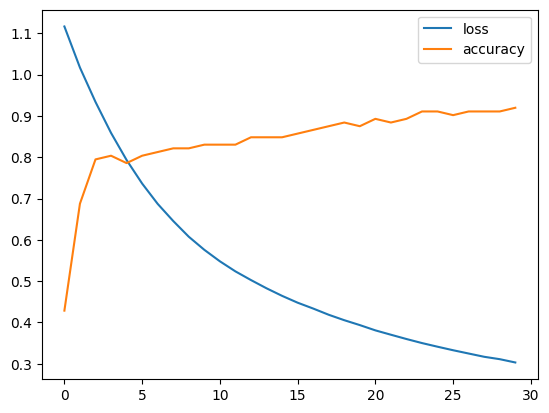

In [7]:
# 4.2.7 学習の推移
import matplotlib.pyplot as plt

hist_loss = history.history['loss'] # 訓練用データの誤差
hist_acc = history.history['accuracy'] # 訓練用データの精度（正解率）
plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss') # 誤差
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy') # 精度（正解率）
plt.legend()
plt.show()

# 教科書のグラフと違い、なぜか最初から精度が高い（笑）

In [9]:
# 4.2.8
loss, accuracy = model.evaluate(x_test, t_test)
print('誤差: ', loss, "精度: ", accuracy)

2/2 [==============================] - 0s 14ms/step - loss: 0.2616 - accuracy: 0.8684
誤差:  0.26160484552383423 精度:  0.8684210777282715


In [10]:
# 4.2.8 予測
y_test = model.predict(x_test)
print(y_test[:10])
# 予測結果は各品種に分類される確率を表す（各行の和は1になる）

2/2 [==============================] - 0s 10ms/step
[[0.04138708 0.35288006 0.60573274]
 [0.03365726 0.3463275  0.6200152 ]
 [0.9892545  0.00776551 0.00298001]
 [0.0264195  0.17791022 0.79567033]
 [0.07724734 0.59095514 0.3317975 ]
 [0.00587662 0.20496279 0.7891605 ]
 [0.969005   0.02362014 0.00737487]
 [0.00731101 0.07531305 0.9173759 ]
 [0.9821857  0.01345602 0.0043582 ]
 [0.10191519 0.60602534 0.29205942]]


In [11]:
# 4.2.10 モデルの保存
from tensorflow.keras.models import load_model

model.save('model.h5') # 保存
load_model('model.h5') # 読み込み

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 4.4 演習

In [16]:
# 4.4.1データの準備
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

iris = datasets.load_iris()

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)

x = scaler.transform(iris.data)
t = to_categorical(iris.target)

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [18]:
# 4.4.3モデルの構築
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 activation_7 (Activation)   (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
 activation_8 (Activation)   (None, 3)                 0         
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.5

In [19]:
# 4.4.3学習
history = model.fit(x_train, t_train, epochs=30, batch_size=8)


Epoch 1/30
14/14 [==============================] - 1s 5ms/step - loss: 1.0567 - accuracy: 0.3571
Epoch 2/30
14/14 [==============================] - 0s 4ms/step - loss: 1.0167 - accuracy: 0.4018
Epoch 3/30
14/14 [==============================] - 0s 4ms/step - loss: 0.9714 - accuracy: 0.4821
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.9227 - accuracy: 0.5357
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.8775 - accuracy: 0.6875
Epoch 6/30
14/14 [==============================] - 0s 6ms/step - loss: 0.8344 - accuracy: 0.8036
Epoch 7/30
14/14 [==============================] - 0s 5ms/step - loss: 0.7946 - accuracy: 0.8482
Epoch 8/30
14/14 [==============================] - 0s 8ms/step - loss: 0.7596 - accuracy: 0.8750
Epoch 9/30
14/14 [==============================] - 0s 8ms/step - loss: 0.7281 - accuracy: 0.8839
Epoch 10/30
14/14 [==============================] - 0s 9ms/step - loss: 0.6996 - accuracy: 0.8839
Epoch 11/30
14/14 [

In [ ]:
# 4.4.4学習の推移
import matp

In [ ]:
# 4.3.1 畳み込みニューラルネットワーク（CNN）

